# Week 4 Mini Project - NLP Disaster Tweets
**Name:** SungHak Hong

**Github:** 
## 1. Introduction and Problem Description

In this project, we will use Python and Machine Learning to build and evaluate a deep learning model for predicting whether a tweet is about a real disaster or not. We will follow the typical data science pipeline, including data exploration, preprocessing, feature engineering, model building, training, and evaluation. We will also discuss the results and provide some concluding remarks.

The dataset contains over 7,500 tweets that have been labeled as either being about a real disaster. The challenge is to build a model that can accurately classify these tweets, as this has important applications in emergency response and public safety..

The NLP Getting Started competition hosted on Kaggle challenges participants to build a machine learning model that can accurately classify tweets as being about a real disaster or not. Natural language processing (NLP) techniques are used to extract features from the text in the tweets, and these features are then used to train a classification model.

The dataset and competition details can be found at the following link:

https://www.kaggle.com/c/nlp-getting-started/overview

## 2. EDA Procedure
### Import Library

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ktrain

from sklearn.model_selection import train_test_split
from ktrain import text

### Load Data

In [3]:
train = pd.read_csv("../week4/train.csv")
test = pd.read_csv("../week4/test.csv")

train.head(10)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [11]:
# Check the dimensions and data types of the DataFrame
print(train.shape)
print(test.shape)
print(train.dtypes)

(7613, 5)
(3263, 4)
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [13]:
#Check the missing value
print(train.isnull().sum())
print(test.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


### Data Analysis and Visualization

C:\Users\vmfl7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


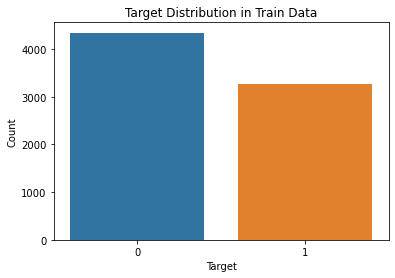

In [17]:
sns.countplot(train["target"])
plt.title("Target Distribution in Train Data")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

The column "target" indicates if the tweets in train dataset contain the real disaster. "Target 0" does not contain disaster, and "Target 1" contains the disaster. 

## Build Model

### Preprocess Data

In [9]:
# Create the balanced data
sample_amount = 1000
class_prop = 0.5

target_1 = train[train['target'] == 1].sample(n=int(sample_amount*class_prop))

target_0 = train[train['target'] == 0].sample(n=int(sample_amount*(1-class_prop)))
train_sample = pd.concat([target_1,target_0])

print(train_sample.describe())

                 id      target
count   1000.000000  1000.00000
mean    5467.651000     0.50000
std     3104.036137     0.50025
min       19.000000     0.00000
25%     2855.750000     0.00000
50%     5462.500000     0.50000
75%     8111.500000     1.00000
max    10873.000000     1.00000


In [22]:
# Feature Extraction
train, val, preprocess = ktrain.text.texts_from_df(
    train_sample,
    "text",
    label_columns=["target"],
    val_df=None,
    max_features=2000, 
    maxlen=128, 
    val_pct=0.2, 
    ngram_range=1, 
    preprocess_mode="bert", 
    verbose=1
)  

['not_target', 'target']
      not_target  target
5116         1.0     0.0
4041         1.0     0.0
6829         0.0     1.0
638          0.0     1.0
1882         1.0     0.0
['not_target', 'target']
      not_target  target
248          1.0     0.0
7404         0.0     1.0
2171         0.0     1.0
1867         1.0     0.0
2054         1.0     0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [23]:
#Build Model
train

model = ktrain.text.text_classifier('bert', train_data=train, preproc=preprocess)
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=6)

Is Multi-Label? False
maxlen is 128


C:\Users\vmfl7\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/6
134/134 [==============================] - 387s 3s/step - loss: 0.7466 - accuracy: 0.5612
Epoch 2/6
134/134 [==============================] - 369s 3s/step - loss: 0.5418 - accuracy: 0.7337
Epoch 3/6
134/134 [==============================] - 387s 3s/step - loss: 0.6251 - accuracy: 0.6725
Epoch 4/6
134/134 [==============================] - 381s 3s/step - loss: 1.4633 - accuracy: 0.5075
Epoch 5/6
134/134 [==============================] - 100s 732ms/step - loss: 4.9317 - accuracy: 0.5143


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


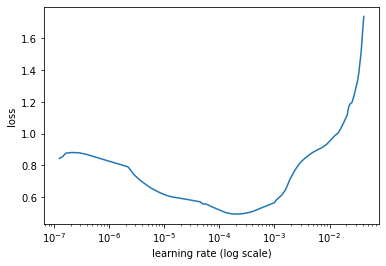

NameError: name 'lr' is not defined

In [24]:
# Learning Rate estimate 
learner.lr_find(max_epochs=6) # limited to 3 epoch for faster computation
learner.lr_plot()



In [25]:
# Check to ensure we are not overfitting 
history=learner.autofit(
    1e-6,
    epochs=6, 
    early_stopping=True
)



begin training using triangular learning rate policy with max lr of 1e-06...
Epoch 1/6
134/134 [==============================] - 423s 3s/step - loss: 0.7668 - accuracy: 0.5250 - val_loss: 0.6351 - val_accuracy: 0.6450
Epoch 2/6
134/134 [==============================] - 402s 3s/step - loss: 0.6233 - accuracy: 0.6875 - val_loss: 0.6035 - val_accuracy: 0.6800
Epoch 3/6
134/134 [==============================] - 411s 3s/step - loss: 0.5834 - accuracy: 0.7188 - val_loss: 0.5828 - val_accuracy: 0.6950
Epoch 4/6
134/134 [==============================] - 429s 3s/step - loss: 0.5495 - accuracy: 0.7325 - val_loss: 0.5704 - val_accuracy: 0.7050
Epoch 5/6
134/134 [==============================] - 416s 3s/step - loss: 0.5338 - accuracy: 0.7487 - val_loss: 0.5431 - val_accuracy: 0.7100
Epoch 6/6
134/134 [==============================] - 412s 3s/step - loss: 0.4994 - accuracy: 0.7688 - val_loss: 0.5258 - val_accuracy: 0.7250
Weights from best epoch have been loaded into model.


In [27]:
# trained model 
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

# results against validation set 
validation = learner.validate(val_data=val, print_report=True)

7/7 [==============================] - 26s 3s/step
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        99
           1       0.73      0.71      0.72       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.72       200



In [29]:
#Print submission
test.to_csv("submisssions.csv", index=False)